# EXERCICE 1

In [17]:
!pip install ydata-profiling
!pip install numpy
!pip install panda
!pip install missingno
!pip install seaborn
!pip install plotly.graph_objs
!pip install scikit-learn
!pip install make_subplots
!pip install profileReport
!pip install Residualsplot
!pip install yellowbrick
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV

from sklearn import linear_model






[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement plotly.graph_objs (from versions: none)
ERROR: No matching distribution found for plotly.graph_objs

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement make_subplots (from versions: none)
ERROR: No matching distribution found for make_subplots

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement profileReport (from versions: none)
ERROR: No matching distribution found for profileReport

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement Residualsplot (from versions: none)
ERROR: No matching distribution found for Residualsplot

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: unknown command "install yel

In [2]:
# Chargement des données
data = pd.read_csv('C:/Users/DELL/Desktop/python1/data/billets.csv', sep=";")
data.shape
data.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
5,True,172.17,103.74,104.08,4.42,2.95,112.81
6,True,172.34,104.18,103.85,4.58,3.26,112.81
7,True,171.88,103.76,104.08,3.98,2.92,113.08
8,True,172.47,103.92,103.67,4.00,3.25,112.85
9,True,172.47,104.07,104.02,4.04,3.25,113.45


In [3]:
data_model = data.loc[lambda dfr: dfr.margin_low.notnull()]
data_model.info()
# Création des Prédicteurs et cible:
# X represente des variables explicatives et y est la cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]
y = data_model.loc[:, 'margin_low']
# Définissons la variable cible et les Prédicteurs
#target = 'margin_low'
#features = ['length', 'height_left', 'height_right', 'margin_up', 'diagonal']

# distinguer des Prédicteurs et de la variable cible
features = X 
target = y

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [4]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 20% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1170, 5) ; y: (1170,) 
Test set - X: (293, 5) ; y: (293,)


In [5]:

# Standardisation des données :

std_scaler = StandardScaler().fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)


In [6]:
# Entraînement et évaluation du modèle
def train_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    
    # Prédictions sur le jeu d'entraînement et de test
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calcul de l'erreur quadratique moyenne (RMSE) pour les deux jeux
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Coefficients des variables explicatives
    coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=["Coefficient"])
    
    return train_error, test_error, coefficients

In [7]:
# Normalisation des données (si nécessaire)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [8]:
from sklearn import linear_model  # Importation du module linear_model

# Modèle ElasticNet
model = linear_model.ElasticNet(fit_intercept=True, alpha=1., l1_ratio=0.5)

# Entraînement et évaluation du modèle
elastic_error = train_model(model=model, 
                            x_train=X_train_std, y_train=y_train,
                            x_test=X_test, y_test=y_test)

# Entraînement du modèle et évaluation
train_error, test_error, coefficients = train_model(model, X_train_std, y_train, X_test_std, y_test)

# Affichage des résultats
print(f"Erreur sur le jeu d'entraînement (RMSE) : {train_error:.4f}")
print(f"Erreur sur le jeu de test (RMSE) : {test_error:.4f}")
print("\nCoefficients des variables explicatives :")
print(coefficients)


Erreur sur le jeu d'entraînement (RMSE) : 0.6671
Erreur sur le jeu de test (RMSE) : 0.6493

Coefficients des variables explicatives :
              Coefficient
diagonal             -0.0
height_left           0.0
height_right          0.0
margin_up             0.0
length               -0.0


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


## Obtenir les Statistiques Descriptives

In [9]:
# Liste des colonnes des variables explicatives
feature_names = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']

# Afficher les statistiques descriptives pour les variables explicatives dans les jeux d'entraînement et de test
print("Statistiques descriptives pour le jeu d'entraînement :")
print(pd.DataFrame(X_train_std, columns=feature_names).describe())

print("\nStatistiques descriptives pour le jeu de test :")
print(pd.DataFrame(X_test_std, columns=feature_names).describe())


Statistiques descriptives pour le jeu d'entraînement :
           diagonal   height_left  height_right     margin_up        length
count  1.170000e+03  1.170000e+03  1.170000e+03  1.170000e+03  1.170000e+03
mean  -3.564632e-14  1.281102e-14  1.527439e-14  7.651999e-16 -2.667572e-15
std    1.000428e+00  1.000428e+00  1.000428e+00  1.000428e+00  1.000428e+00
min   -3.051326e+00 -2.981440e+00 -3.090245e+00 -3.765785e+00 -3.091437e+00
25%   -7.032676e-01 -7.189341e-01 -6.478999e-01 -6.989264e-01 -7.307368e-01
50%   -9.713049e-03  1.305292e-02 -6.784292e-03 -5.999743e-02  3.152876e-01
75%    6.921976e-01  6.784957e-01  6.953899e-01  6.641221e-01  7.582761e-01
max    3.098748e+00  2.807913e+00  3.137735e+00  3.219838e+00  1.881466e+00

Statistiques descriptives pour le jeu de test :
         diagonal  height_left  height_right   margin_up      length
count  293.000000   293.000000    293.000000  293.000000  293.000000
mean    -0.061960    -0.078815     -0.011369   -0.021327    0.003152
std  

## Visualiser les Distributions des Variables
Utilisons des histogrammes pour visualiser et comparer les distributions des variables explicatives dans les deux ensembles :

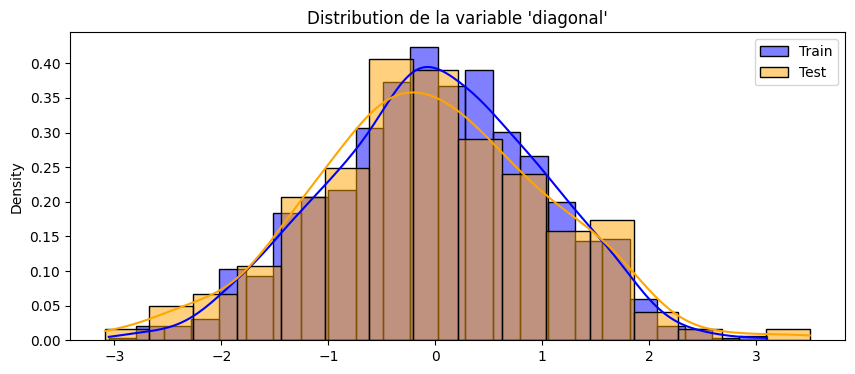

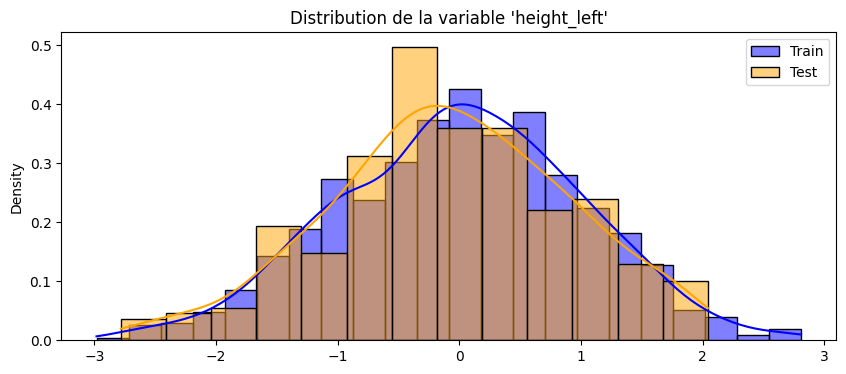

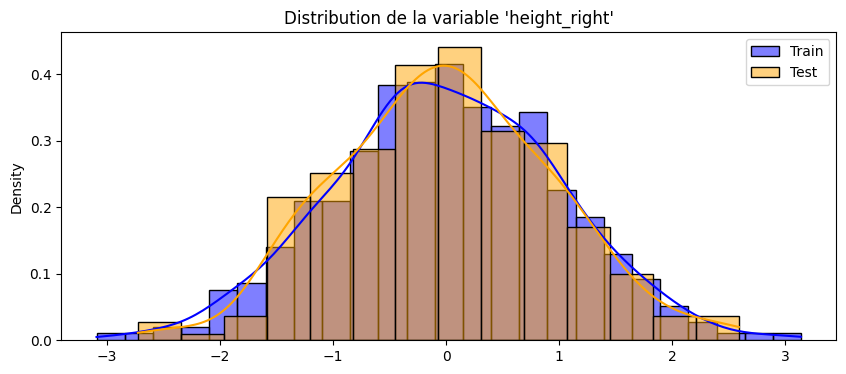

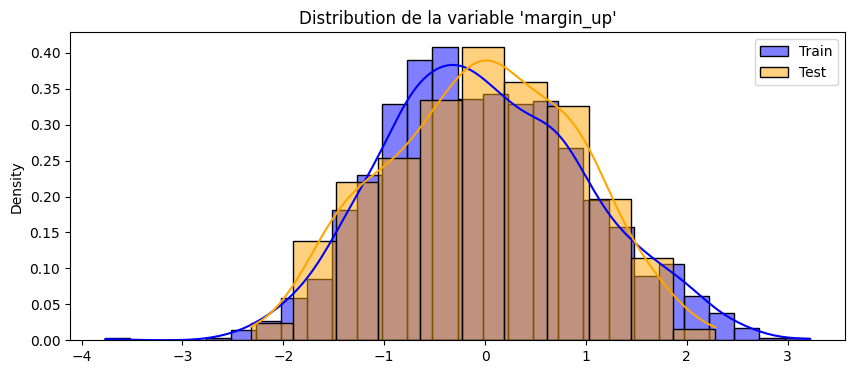

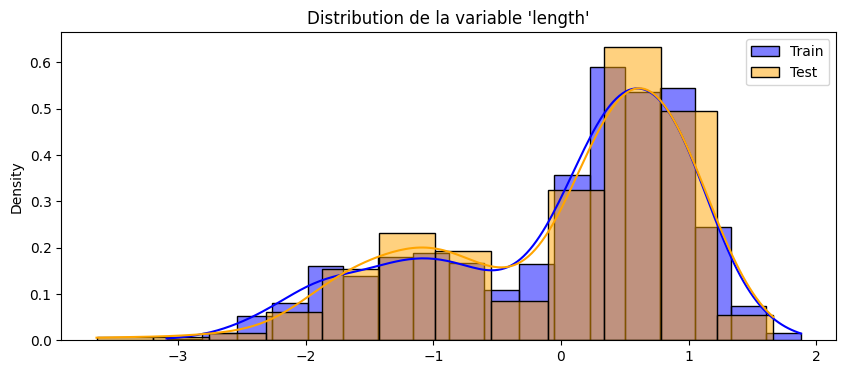

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation des distributions pour chaque variable
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(10, 4))
    sns.histplot(X_train_std[:, i], color="blue", label="Train", kde=True, stat="density")
    sns.histplot(X_test_std[:, i], color="orange", label="Test", kde=True, stat="density")
    plt.title(f"Distribution de la variable '{feature}'")
    plt.legend()
    plt.show()


## Comparaison des Corrélations entre Variables Explicatives
Comparer les matrices de corrélation des deux ensembles de données peut révéler des différences dans la structure des relations entre les variables explicatives :

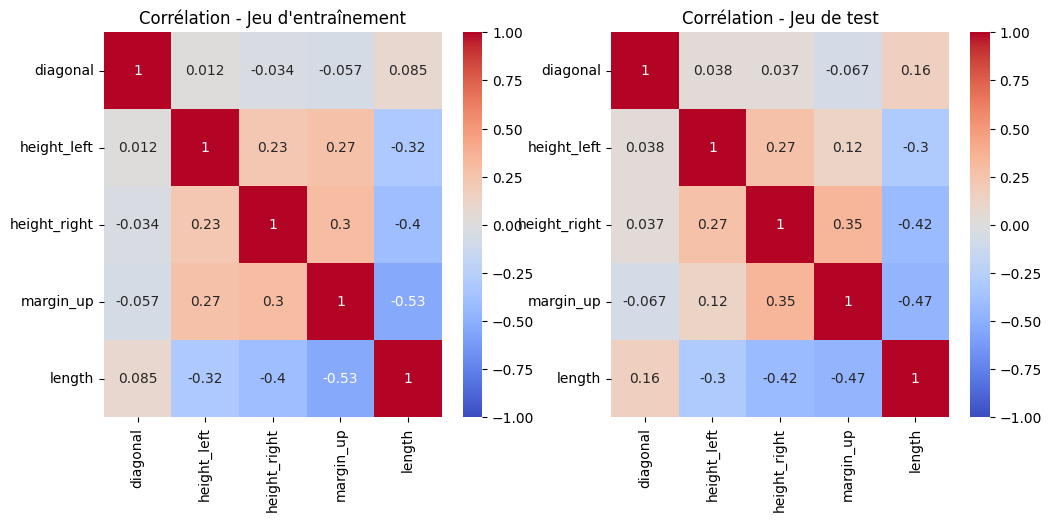

In [11]:
# Calculer et afficher les matrices de corrélation pour les jeux d'entraînement et de test
train_corr = pd.DataFrame(X_train_std, columns=feature_names).corr()
test_corr = pd.DataFrame(X_test_std, columns=feature_names).corr()

plt.figure(figsize=(12, 5))

# Matrice de corrélation pour le jeu d'entraînement
plt.subplot(1, 2, 1)
sns.heatmap(train_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélation - Jeu d'entraînement")

# Matrice de corrélation pour le jeu de test
plt.subplot(1, 2, 2)
sns.heatmap(test_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélation - Jeu de test")

plt.show()


## Comparaison des Performances du Modèle sur les Jeux d'Entraînement et de Test
Enfin, si le modèle ElasticNet a déjà été entraîné, vous pouvez comparer les performances du modèle sur les jeux d'entraînement et de test pour observer si des différences entre les ensembles ont un impact.

In [12]:
from sklearn.metrics import mean_squared_error

# Prédictions sur le jeu d'entraînement et de test
train_predictions = model.predict(X_train_std)  
test_predictions = model.predict(X_test_std)    

# Calcul des erreurs
train_error = mean_squared_error(y_train, train_predictions)
test_error = mean_squared_error(y_test, test_predictions)

print(f"Erreur sur le jeu d'entraînement : {train_error}")
print(f"Erreur sur le jeu de test : {test_error}")


Erreur sur le jeu d'entraînement : 0.44505726203521073
Erreur sur le jeu de test : 0.42154010210235815


# EXERCICE 2

In [13]:
import numpy as np 
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)
model.fit(X_train, y_train)
best_alpha = model.alpha_


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [19]:
from sklearn.linear_model import LassoCV
model = LassoCV(cv=5)
model.fit(X_train, y_train)
best_alpha = model.alpha_


In [20]:

# Créer le modèle ElasticNetCV avec une grille alpha et un l1_ratio entre 0 et 1
model = ElasticNetCV(l1_ratio=0.5, alphas=np.logspace(-6, 6, 13), cv=5)
model.fit(X_train, y_train)

# Affichage des meilleurs paramètres
best_alpha = model.alpha_
best_l1_ratio = model.l1_ratio_
print(f"Meilleur alpha trouvé : {best_alpha}")
print(f"Meilleur l1_ratio trouvé : {best_l1_ratio}")



Meilleur alpha trouvé : 1e-06
Meilleur l1_ratio trouvé : 0.5


In [23]:


# Définir une grille d'alpha
alphas = np.logspace(-6, 6, 13)

# Créer le modèle ElasticNetCV avec une grille de valeurs l1_ratio et alpha
model = ElasticNetCV(l1_ratio=np.linspace(0, 1, 11), alphas=alphas, cv=5)

# Entraîner le modèle
model.fit(X_train, y_train)

# Extraire la meilleure valeur de alpha et l1_ratio
best_alpha = model.alpha_
best_l1_ratio = model.l1_ratio_
print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.5160401441734, tolerance: 0.041103223579059836
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\DELL\AppData\Lo

Best alpha: 0.01
Best l1_ratio: 0.0


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.424e+02, tolerance: 5.207e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
